In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [15]:
class SOR:

  def __init__(self, initialX, A, b, tolerance, maxIterations, w):
    self.x = initialX
    self.A = A
    self.b = b
    self.tolerance = tolerance
    self.maxIterations = maxIterations
    self.w = w

  def sor(self):
    # Diagonal
    D = np.diag(self.A)

    # Lower diagonal
    L = np.tril(self.A, -1)
    
    # Upper diagonal
    U = np.triu(self.A, 1)

    iter = 0

    # If there is a zero in the diagonal then the method will not converge
    if 0. in D:
      return np.array([np.NAN]), iter, None, None

    # D - ωL
    Q =  self.w*L + np.diag(D) 

    # (1-ω)D + ωU
    P = (1 - self.w)*np.diag(D) - self.w*np.asmatrix(U)

    # Q^-1
    inverseQ = np.linalg.inv(Q)

    # x will initially be a vector with random values
    x = np.random.uniform(size=(np.size(self.b), 1))

    # The new vector x(newX) will be x0(the initial x guess) 
    newX = self.x

    # List of local errors
    # Calculate the infinite norm error value of the initial guess x(x0) and the random vector x
    localErrors = [np.linalg.norm(newX - x, np.inf)]

    # List of x solutions
    xSolutions = [self.x]
    
    # Start time
    startTime = time.time()

    while iter < self.maxIterations and localErrors[iter] > self.tolerance:

      x = newX
      iter += 1

      # Calculate a new x solution
      newX = np.asmatrix(inverseQ) * np.asmatrix(P) * np.asmatrix(x) + self.w*np.asmatrix(inverseQ)*np.asmatrix(self.b)

      # Add the local error to the list of local errors
      localErrors.append(np.linalg.norm(newX - x, np.inf))

      # Add the new solution x to the list of solutions
      xSolutions.append(newX)
    
    x = newX
    xSolutions.append(x)

    # End time
    endTime = time.time()
    print(f'Completed at {endTime - startTime} \n')

    return xSolutions, iter, localErrors, x

  
  # Plot the local erros
  def plotError(self, error):
    figure = plt.figure(1)
    plt.title("Error")
    plt.plot(error[1:])
    plt.grid()
    plt.show()


Completed at 0.0009109973907470703 

X Solutions: 
[0.][0.][0.]
[[0.9]][[0.63]][[0.957]]
[[1.0267875]][[0.95538696]][[0.9948038]]
[[1.00711314]][[0.99511708]][[0.99854604]]
[[1.00109707]][[0.99927889]][[0.9997073]]
[[1.0001579]][[0.99987293]][[0.99995186]]
[[1.00002467]][[0.99997808]][[0.99999244]]
[[1.00000408]][[0.99999639]][[0.99999879]]
[[1.00000068]][[0.99999941]][[0.9999998]]
[[1.00000011]][[0.9999999]][[0.99999997]]
[[1.00000002]][[0.99999998]][[0.99999999]]
[[1.]][[1.]][[1.]]
[[1.]][[1.]][[1.]]
[[1.]][[1.]][[1.]]

The solution to Ax=b is 
[[1.]
 [1.]
 [1.]]

The maximum iteration for the jacobi method is 12

The error is 2.4823765265580278e-09


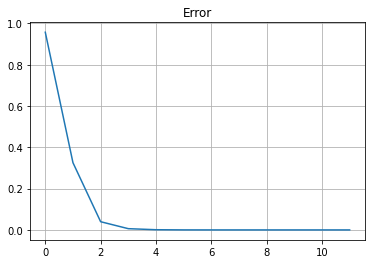

In [20]:
# A matrix
A = np.array([
    [8, 1, -1],
    [1, -7, 2],
    [2, 1, 9]
])

# Tolerance value
tolerance = 1e-8

# Initial x vector
initialX = np.array([0., 0., 0.])
initialX = initialX[:, np.newaxis]

# b vector
b = np.array([8, -4, 12])
b = b[:, np.newaxis]

sor = SOR(initialX, A, b, tolerance, 20, 0.9)
xSolutions, iter, errors, X = sor.sor()

# Print all the solutions for every iteration
print("X Solutions: ")
# For every x solution
for x in xSolutions:
  # For every element in the x solution
  for elem in x:
    print(f'{elem}', end="")
  print()

# Print the solution to the Ax=b
print(f'\nThe solution to Ax=b is \n{X}')

# Print the maximum iteration the jacobi method has reached
print(f'\nThe maximum iteration for the jacobi method is {iter}')

# Print the error
print(f'\nThe error is {errors[-1]}')

# Graph the errors
sor.plotError(errors)